In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [6]:
#IMPORTANDO DADOS
dataset = pd.read_csv("Churn.csv",sep=";")
#Vizualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#Tamanho
dataset.shape

(999, 12)

In [8]:
#NOMEANDO COLUNAS
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartao","Ativo","Salario","Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

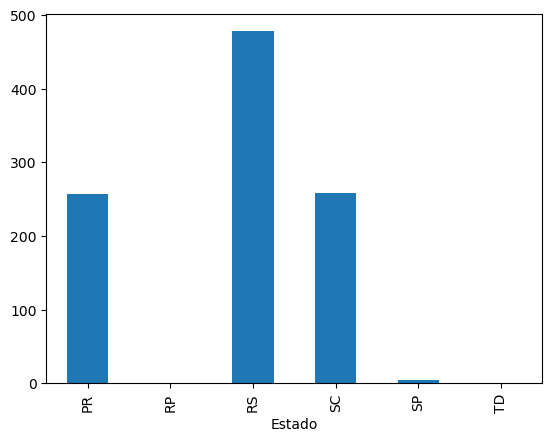

In [18]:
#EXPLORAR DADOS CATEGORICOS
#EX: ESTADOS

agrupado = dataset.groupby(["Estado"]).size()
agrupado.plot.bar()
agrupado

In [19]:
#EXPLORANDO DADOS NUMERICOS
#EX: SALARIO
dataset['Salario'].describe

<bound method NDFrame.describe of 0      10134888.0
1      11254258.0
2      11393157.0
3       9382663.0
4        790841.0
          ...    
994    14576583.0
995     8391224.0
996     7843973.0
997      677692.0
998      990342.0
Name: Salario, Length: 999, dtype: float64>

Text(0.5, 1.0, 'Score')

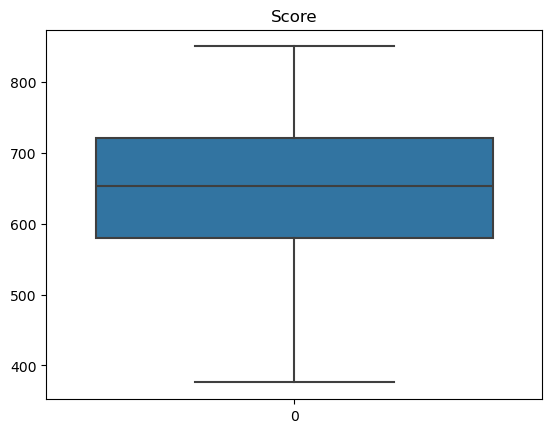

In [26]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\guilh\AppData\Local\Temp\ipykernel_7236\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')
C:\Users\guilh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Score')

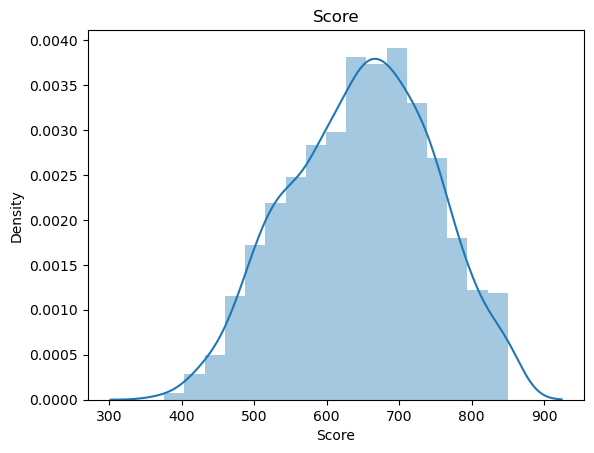

In [25]:
srn.distplot(dataset['Score']).set_title('Score')

In [28]:
#CHECANDO A EXISTENCIA DE DADOS NA
dataset.isnull().sum()

Id            0
Score         0
Estado        0
Genero        8
Idade         0
Patrimonio    0
Saldo         0
Produtos      0
TemCartao     0
Ativo         0
Salario       7
Saiu          0
dtype: int64

In [27]:
#AGORA QUE SABEMOS COMO ANALISAR OS DADOS VAMOS PARA A LIMPEZA DELES!

In [35]:
#SALARIO
#vamos remover e substituir os NA pela media
media = sts.median(dataset["Salario"])

#INSERIR MEDIA NOS NA
dataset['Salario'].fillna(media, inplace=True)

#VERIFICAR SE NA AINDA EXISTE NESSA CATEGORIA#
dataset['Salario'].isnull().sum()

0

In [36]:
#GENERO
generos = dataset.groupby(["Genero"]).size()
generos

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [46]:
#vamos preencher os NA e tranformar "F", "Fem" e "M" em seus nomes corretos: "Masculino" e "Feminino"
#Primeiro vamos arrumar a categorizacao
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino"
generos = dataset.groupby(["Genero"]).size()
generos

Genero
Feminino     464
Masculino    535
dtype: int64

In [48]:
#AGORA VAMOS PREENCHER NA COM A MODA
dataset['Genero'].fillna('Masculino', inplace = True)
dataset['Genero'].isnull().sum()

0

In [50]:
#IDADE
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [59]:
#podemos ver que certas idades estao fora do dominio ex:140 anos de idade e -20 anos de idade
#vamos corrigir isso substitiuindo pela media
mediaidade = sts.median(dataset['Idade'])
mediaidade

dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediaidade

#verificar novamente as idades
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu


In [60]:
#ID
#verificar dados duplicados
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [61]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartao,Ativo,Salario,Saiu


In [63]:
#ESTADOS FORA DO DOMINIO
estados = dataset.groupby(['Estado']).size()
estados

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [65]:
#O DOMINO É RS SC E PR. TODOS QUE NAO SAO ELES VAO FORA
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [66]:
dataset['Estado'].fillna('RS', inplace = True)
dataset['Estado'].isnull().sum()

0